### 목표 : 다중 속성/피쳐를 기반으로 수치값 예측
- 데이터 : fish.csv
- 피쳐 : 4개 Length, Diagonal, Height, Width
- 타겟 : 수치값 Weight
- 학습유형 : 지도학습 + 회귀
- 알고리즘 : 데이터를 확인 후 결정

(1) 모듈 로딩 및 데이터 준비

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [126]:
# 데이터 준비
data_file = '../data/fish.csv'

# Bream 행만 추출 => 35개 행만 추출
dataDF = pd.read_csv(data_file, nrows=35, usecols=[1,2,3,4,5])

In [127]:
# 기본 정보
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Weight    35 non-null     int64  
 1   Length    35 non-null     float64
 2   Diagonal  35 non-null     float64
 3   Height    35 non-null     float64
 4   Width     35 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.5 KB


(2) 데이터 확인

- 타겟과 피쳐 관계 => 상관계수, 시각화

In [128]:
# 피쳐와 타겟과의 관계 정도를 시각화 및 수치값으로 표기 및 출력
# 매개변수 : 행수, 열수, 타겟, 피쳐리스트, 상관계수값
# 반환 : 없음
def print_feature(nrows, ncols, df, target, features, corrs):
    for idx in range(len(features)):
        plt.subplot(nrows, ncols, idx+1)
        plt.scatter(df[target], df[features[idx]], label=f'corr:{round(corrs[idx], 2)}')
        plt.xlabel(target)
        plt.ylabel(features[idx])
        plt.legend()
    plt.tight_layout()
    plt.show()
    
def print_hist(nrows, ncols, df, target, features, corrs):
    for idx in range(len(features)):
        plt.subplot(nrows, ncols, idx+1)
        plt.hist(df[features[idx]], label=f'corr:{round(corrs[idx], 2)}')
        plt.xlabel(features[idx])
        plt.ylabel('values')
        plt.legend()
    plt.tight_layout()
    plt.show()

In [129]:
features  = dataDF.columns[1:]
target = dataDF.columns[0]
corrList = dataDF.corr()['Weight'].to_list()

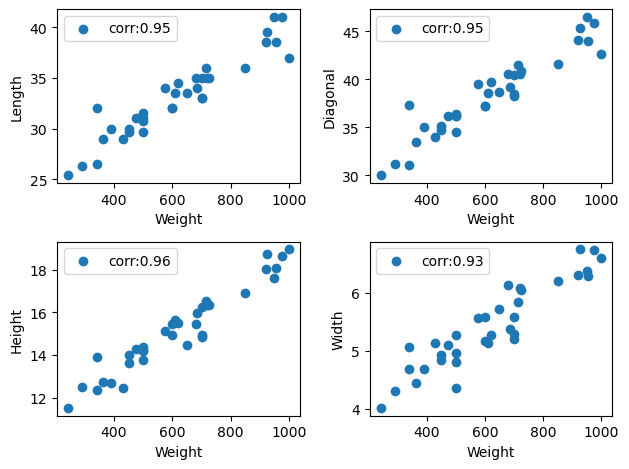

In [130]:
print_feature(2, 2, dataDF, target, features, corrList[1:])

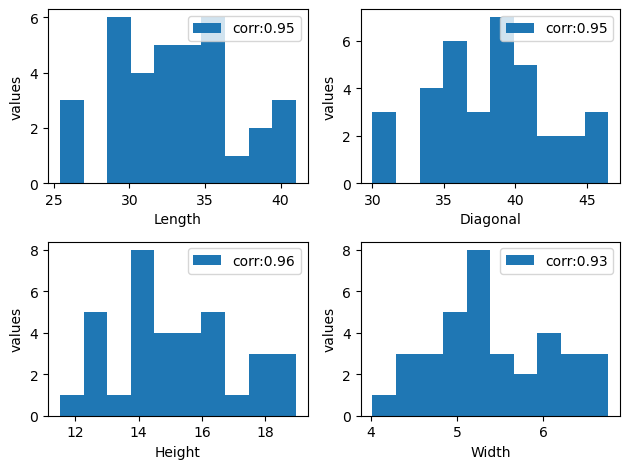

In [131]:
print_hist(2, 2, dataDF, target, features, corrList[1:])

(3) 학습 준비
- 학습 알고리즘 : 양의 선형관계 파악됨 => 선형모델
- 학습 데이터 준비 : 피쳐-타겟 분리, 학습용 데이터셋 - 테스트용 데이터셋
- 피쳐 값의 범위 비교 : 작은 범위 최대값 8 ~ 큰 범위 최대값 50 => 피쳐 스케일링

(3-1) 학습 데이터 분리 => 피쳐-타겟, 학습용 데이터셋 - 테스트용 데이터셋

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [133]:
# 피쳐와 타겟 분리
featureDF = dataDF[dataDF.columns[1:]]
featureDF

,Length,Diagonal,Height,Width
0,25.4,30.0,11.5200,4.0200
1,26.3,31.2,12.4800,4.3056
2,26.5,31.1,12.3778,4.6961
3,29.0,33.5,12.7300,4.4555
4,29.0,34.0,12.4440,5.1340
5,29.7,34.7,13.6024,4.9274
6,29.7,34.5,14.1795,5.2785
7,30.0,35.0,12.6700,4.6900
8,30.0,35.1,14.0049,4.8438
9,30.7,36.2,14.2266,4.9594


In [134]:
targetDF = dataDF[dataDF.columns[0]]
targetDF

0      242
1      290
2      340
3      363
4      430
5      450
6      500
7      390
8      450
9      500
10     475
11     500
12     500
13     340
14     600
15     600
16     700
17     700
18     610
19     650
20     575
21     685
22     620
23     680
24     700
25     725
26     720
27     714
28     850
29    1000
30     920
31     955
32     925
33     975
34     950
Name: Weight, dtype: int64

In [135]:
# 데이터셋 준비 => 70:30
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF,
                                                    random_state=7, test_size=0.3)

In [136]:
print(f'[훈련용] X_train : {X_train.shape}, y_train : {y_train.shape}')
print(f'[테스트용] X_test : {X_test.shape}, y_test : {y_test.shape}')

[훈련용] X_train : (24, 4), y_train : (24,)
[테스트용] X_test : (11, 4), y_test : (11,)


(3-2) 피쳐 스케일링 ==> 훈련데이터로 생성

In [137]:
std_scaler = StandardScaler()
std_scaler.fit(X_train, y_train)

StandardScaler()

In [138]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train, y_train)

MinMaxScaler()

In [139]:
rb_scaler = RobustScaler()
rb_scaler.fit(X_train, y_train)

RobustScaler()

In [140]:
# 3가지 버전에 스케일된 데이터셋 준비
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

X_train_mm = mm_scaler.transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

X_train_rb =rb_scaler.transform(X_train)
X_test_rb = rb_scaler.transform(X_test)

X_train_list = [X_train_std, X_train_mm, X_train_rb]
X_test_list = [X_test_std, X_test_mm, X_test_rb]

In [141]:
X_train_std.shape, X_train_mm.shape, X_train_rb.shape

((24, 4), (24, 4), (24, 4))

(4) 학습 진행

In [142]:
from sklearn.linear_model import LinearRegression

In [143]:
modelList = []
for idx in range(len(X_train_list)):
    modelList.append(LinearRegression())
    modelList[idx].fit(X_train_list[idx], y_train)

    print(f'[모델 파라미터] =====>\ncoef_: {modelList[idx].coef_}\nintercept_: {modelList[idx].intercept_}')

[모델 파라미터] =====>
coef_: [  5.81124146  56.71151617 108.02781251  28.46942271]
intercept_: 633.9583333333335
[모델 파라미터] =====>
coef_: [ 24.4510372  237.85530063 421.56213804 107.59527035]
intercept_: 233.29753954443743
[모델 파라미터] =====>
coef_: [  6.66134026  68.47349563 126.10019259  41.85970066]
intercept_: 613.6037101327802


(5) 모델 평가
- 훈련용 데이터셋의 점수와 테스트 데이터셋 점수 비교
    * 훈련 점수 > 테스트 점수 : 과대적합
    * 훈련 점수 ▼, 테스트 점수 ▼ : 과소적합
    * 훈련 점수 ≒ 테스트 점수 : 최적적합

In [144]:
for idx in range(len(X_test_list)):
    train_score = modelList[idx].score(X_train_list[idx], y_train)
    test_score = modelList[idx].score(X_test_list[idx], y_test)
    
    print(f'[model {idx}] : Train Score : {train_score} --- Test Score : {test_score}')

[model 0] : Train Score : 0.9546390373777777 --- Test Score : 0.9064944670000151
[model 1] : Train Score : 0.9546390373777777 --- Test Score : 0.9064944670000149
[model 2] : Train Score : 0.9546390373777777 --- Test Score : 0.9064944670000151


In [145]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [146]:
for idx in range(len(modelList)):
    y_pre = modelList[idx].predict(X_test_list[idx])
    
    print(f'Model {idx} test result ---')
    print(f'r2_score : {r2_score(y_test, y_pre)}')
    print(f'mean_squared_error : {mean_squared_error(y_test, y_pre)}')
    print(f'mean_absolute_error : {mean_absolute_error(y_test, y_pre)}')
    print()

Model 0 test result ---
r2_score : 0.9064944670000151
mean_squared_error : 4356.1214009992955
mean_absolute_error : 44.87106263853371

Model 1 test result ---
r2_score : 0.9064944670000149
mean_squared_error : 4356.121400999305
mean_absolute_error : 44.87106263853378

Model 2 test result ---
r2_score : 0.9064944670000151
mean_squared_error : 4356.1214009992955
mean_absolute_error : 44.871062638533715
